In [182]:
# Project Description

#I chose the **Phishing Website Dataset** from Kaggle because it is directly relevant to cybersecurity — an increasingly important field that affects everyone. This dataset contains features extracted from real websites and aims to classify whether a given website is legitimate or a phishing attempt.

#This project is interesting because it shows how various small attributes (like the presence of an IP address, abnormal URLs, or HTTPS usage) can reveal malicious intent. Analyzing these features can help improve digital safety and deepen understanding of online threats.


In [183]:
# ## 2️⃣ System Stage – Phishing Website Dataset

# - **File name:** phishing.csv  
# - **File size:** Approximately a few MB  
# - **File type:** CSV (Comma-Separated Values)  
# - **Source:** Kaggle - Phishing Website Detector  
# - **Protocol:** Downloaded via HTTPS  
# - **Versioning:**  
#   - Only one file provided; no formal versions  
#   - Project version control is managed via Git  


In [184]:
# ## 3️⃣ Metadata

# - **Data Types:**  
#   All features are binary (0 or 1), with the target column named `class`:  
#   - `1` = legitimate website  
#   - `-1` = phishing website  

# - **Missing Values:**  
#   No missing values were found in this dataset. All rows are complete and usable for modeling.

# - **Special Values:**  
#   No special placeholder values (like “unknown” or -999) were found. The data is clean and well-formatted for direct use in machine learning.

# ---

# ### Feature Explanation for Phishing Website Dataset

# | Feature Name        | Description                                                                                   |
# |---------------------|-----------------------------------------------------------------------------------------------|
# | **Index**           | A unique identifier or serial number for each sample (not used in modeling).                   |
# | **UsingIP**         | Whether the website URL uses an IP address instead of a domain name (1 = yes, -1 = no).        |
# | **LongURL**         | Whether the URL is unusually long (1 = yes, -1 = no).                                         |
# | **ShortURL**        | Whether the URL is suspiciously short (1 = yes, -1 = no).                                     |
# | **Symbol@**         | Presence of '@' symbol in URL (1 = yes, -1 = no).                                             |
# | **Redirecting//**   | Whether the URL contains '//' after the protocol part (1 = yes, -1 = no).                      |
# | **PrefixSuffix-**   | Use of hyphen '-' in the domain name (1 = yes, -1 = no).                                      |
# | **SubDomains**      | Number of subdomains (1 = more subdomains than usual, -1 = normal).                            |
# | **HTTPS**           | Whether the website uses HTTPS protocol (1 = yes, -1 = no).                                   |
# | **DomainRegLen**    | Length of domain registration (1 = short registration period, -1 = long).                      |
# | **Favicon**         | Whether the favicon is loaded from the same domain (1 = yes, -1 = no).                        |
# | **NonStdPort**      | Use of non-standard port in URL (1 = yes, -1 = no).                                           |
# | **HTTPSDomainURL**  | Whether HTTPS is present in the domain name part of the URL (1 = yes, -1 = no).               |
# | **RequestURL**      | Whether resources are loaded from an external domain (1 = yes, -1 = no).                      |
# | **AnchorURL**       | Whether anchor tags link to external domains (1 = yes, -1 = no).                             |
# | **LinksInScriptTags** | Presence of links inside script tags (1 = yes, -1 = no).                                    |
# | **ServerFormHandler** | Whether the form handler is on an external server (1 = yes, -1 = no).                       |
# | **InfoEmail**       | Whether the website contains email information (1 = yes, -1 = no).                           |
# | **AbnormalURL**     | Whether the URL has abnormalities (1 = yes, -1 = no).                                        |
# | **WebsiteForwarding** | Whether the website forwards to another URL (1 = yes, -1 = no).                            |
# | **StatusBarCust**   | Whether the status bar is customized (1 = yes, -1 = no).                                     |
# | **DisableRightClick** | Whether right-click is disabled (1 = yes, -1 = no).                                        |
# | **UsingPopupWindow** | Presence of popup windows (1 = yes, -1 = no).                                               |
# | **IframeRedirection** | Use of iframes for redirection (1 = yes, -1 = no).                                          |
# | **AgeofDomain**     | Domain age (1 = young domain, -1 = old).                                                     |
# | **DNSRecording**    | Whether the domain is recorded in DNS (1 = yes, -1 = no).                                   |
# | **WebsiteTraffic**  | Website traffic rank (1 = low traffic, -1 = high).                                          |
# | **PageRank**        | Page rank of the website (1 = low, -1 = high).                                              |
# | **GoogleIndex**     | Whether the website is indexed by Google (1 = no, -1 = yes).                                |
# | **LinksPointingToPage** | Number of links pointing to the page (1 = few, -1 = many).                              |
# | **StatsReport**     | Whether there are statistical reports about the site (1 = no, -1 = yes).                    |
# | **class**           | Target variable: `1` = legitimate website, `-1` = phishing website.                         |



In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [186]:
df = pd.read_csv("phishing.csv")
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

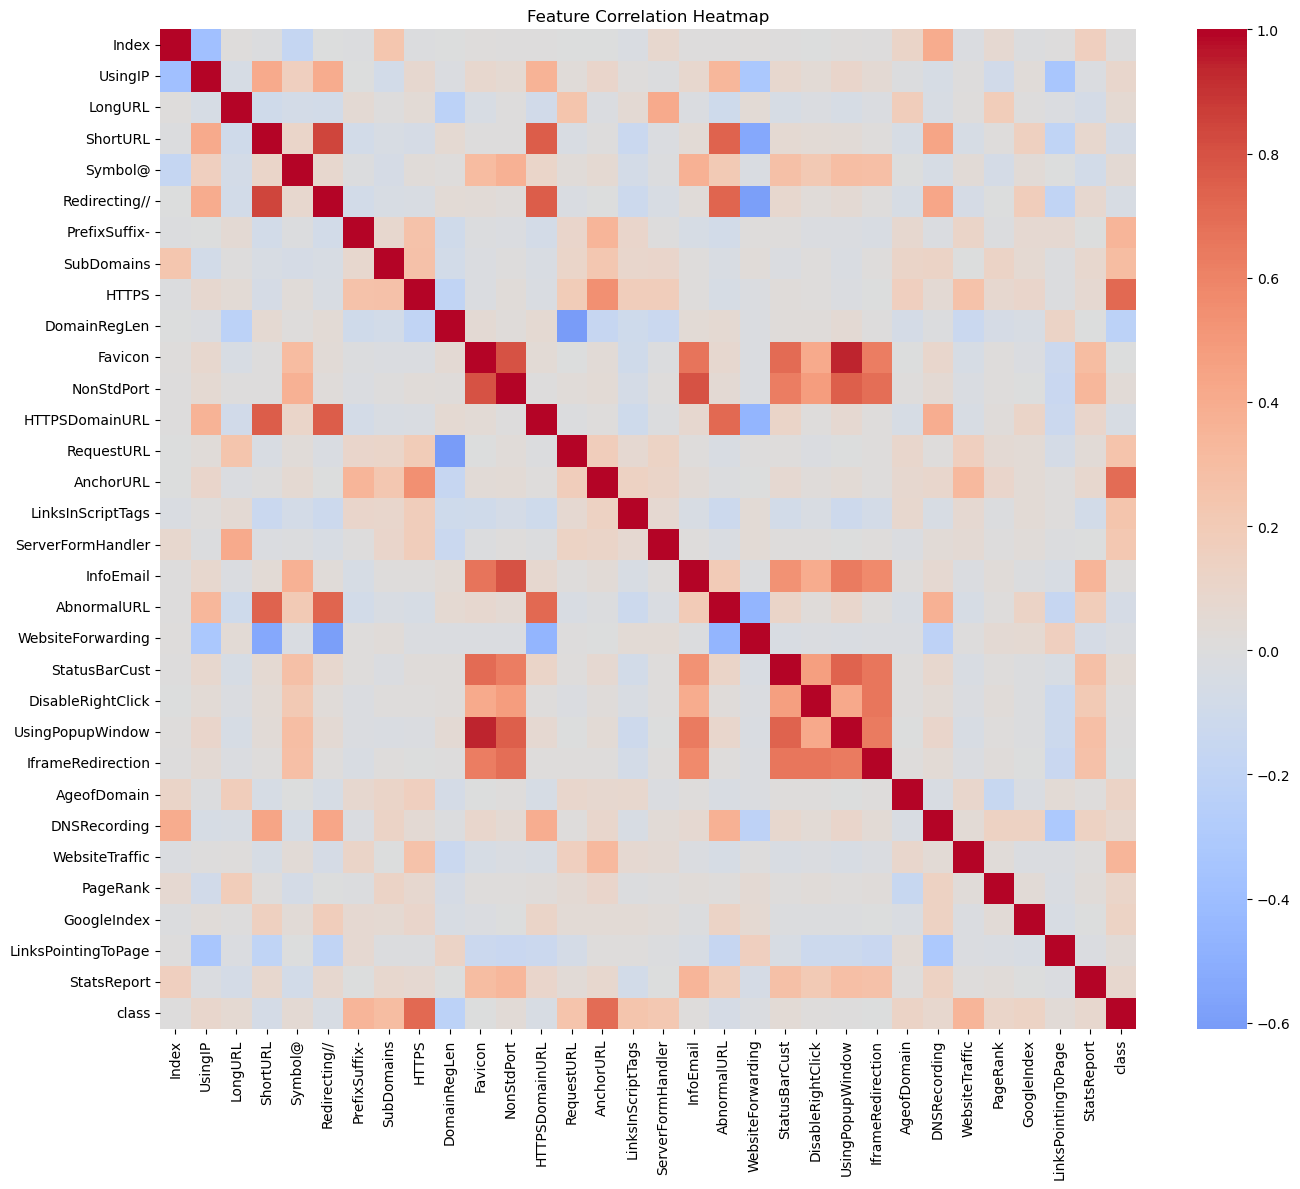

In [187]:
# Compute correlation matrix on the current DataFrame (excluding non-numeric columns if any)
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [188]:
for col in X.columns:
    unique_vals = X[col].nunique()
    print(f"Feature '{col}' has {unique_vals} unique values.")

Feature 'UsingIP' has 2 unique values.
Feature 'LongURL' has 3 unique values.
Feature 'ShortURL' has 2 unique values.
Feature 'Symbol@' has 2 unique values.
Feature 'Redirecting//' has 2 unique values.
Feature 'PrefixSuffix-' has 2 unique values.
Feature 'SubDomains' has 3 unique values.
Feature 'HTTPS' has 3 unique values.
Feature 'DomainRegLen' has 2 unique values.
Feature 'Favicon' has 2 unique values.
Feature 'HTTPSDomainURL' has 2 unique values.
Feature 'RequestURL' has 2 unique values.
Feature 'AnchorURL' has 3 unique values.
Feature 'LinksInScriptTags' has 3 unique values.
Feature 'ServerFormHandler' has 3 unique values.
Feature 'AbnormalURL' has 2 unique values.
Feature 'UsingPopupWindow' has 2 unique values.
Feature 'DNSRecording' has 2 unique values.
Feature 'WebsiteTraffic' has 3 unique values.
Feature 'PageRank' has 2 unique values.
Feature 'GoogleIndex' has 2 unique values.
Feature 'LinksPointingToPage' has 3 unique values.


In [189]:
# we can see that favicon and using popupwindow are highly correlated, so we can drop one of them.
# PCA wont work well here because alot of the features arent correlated. 

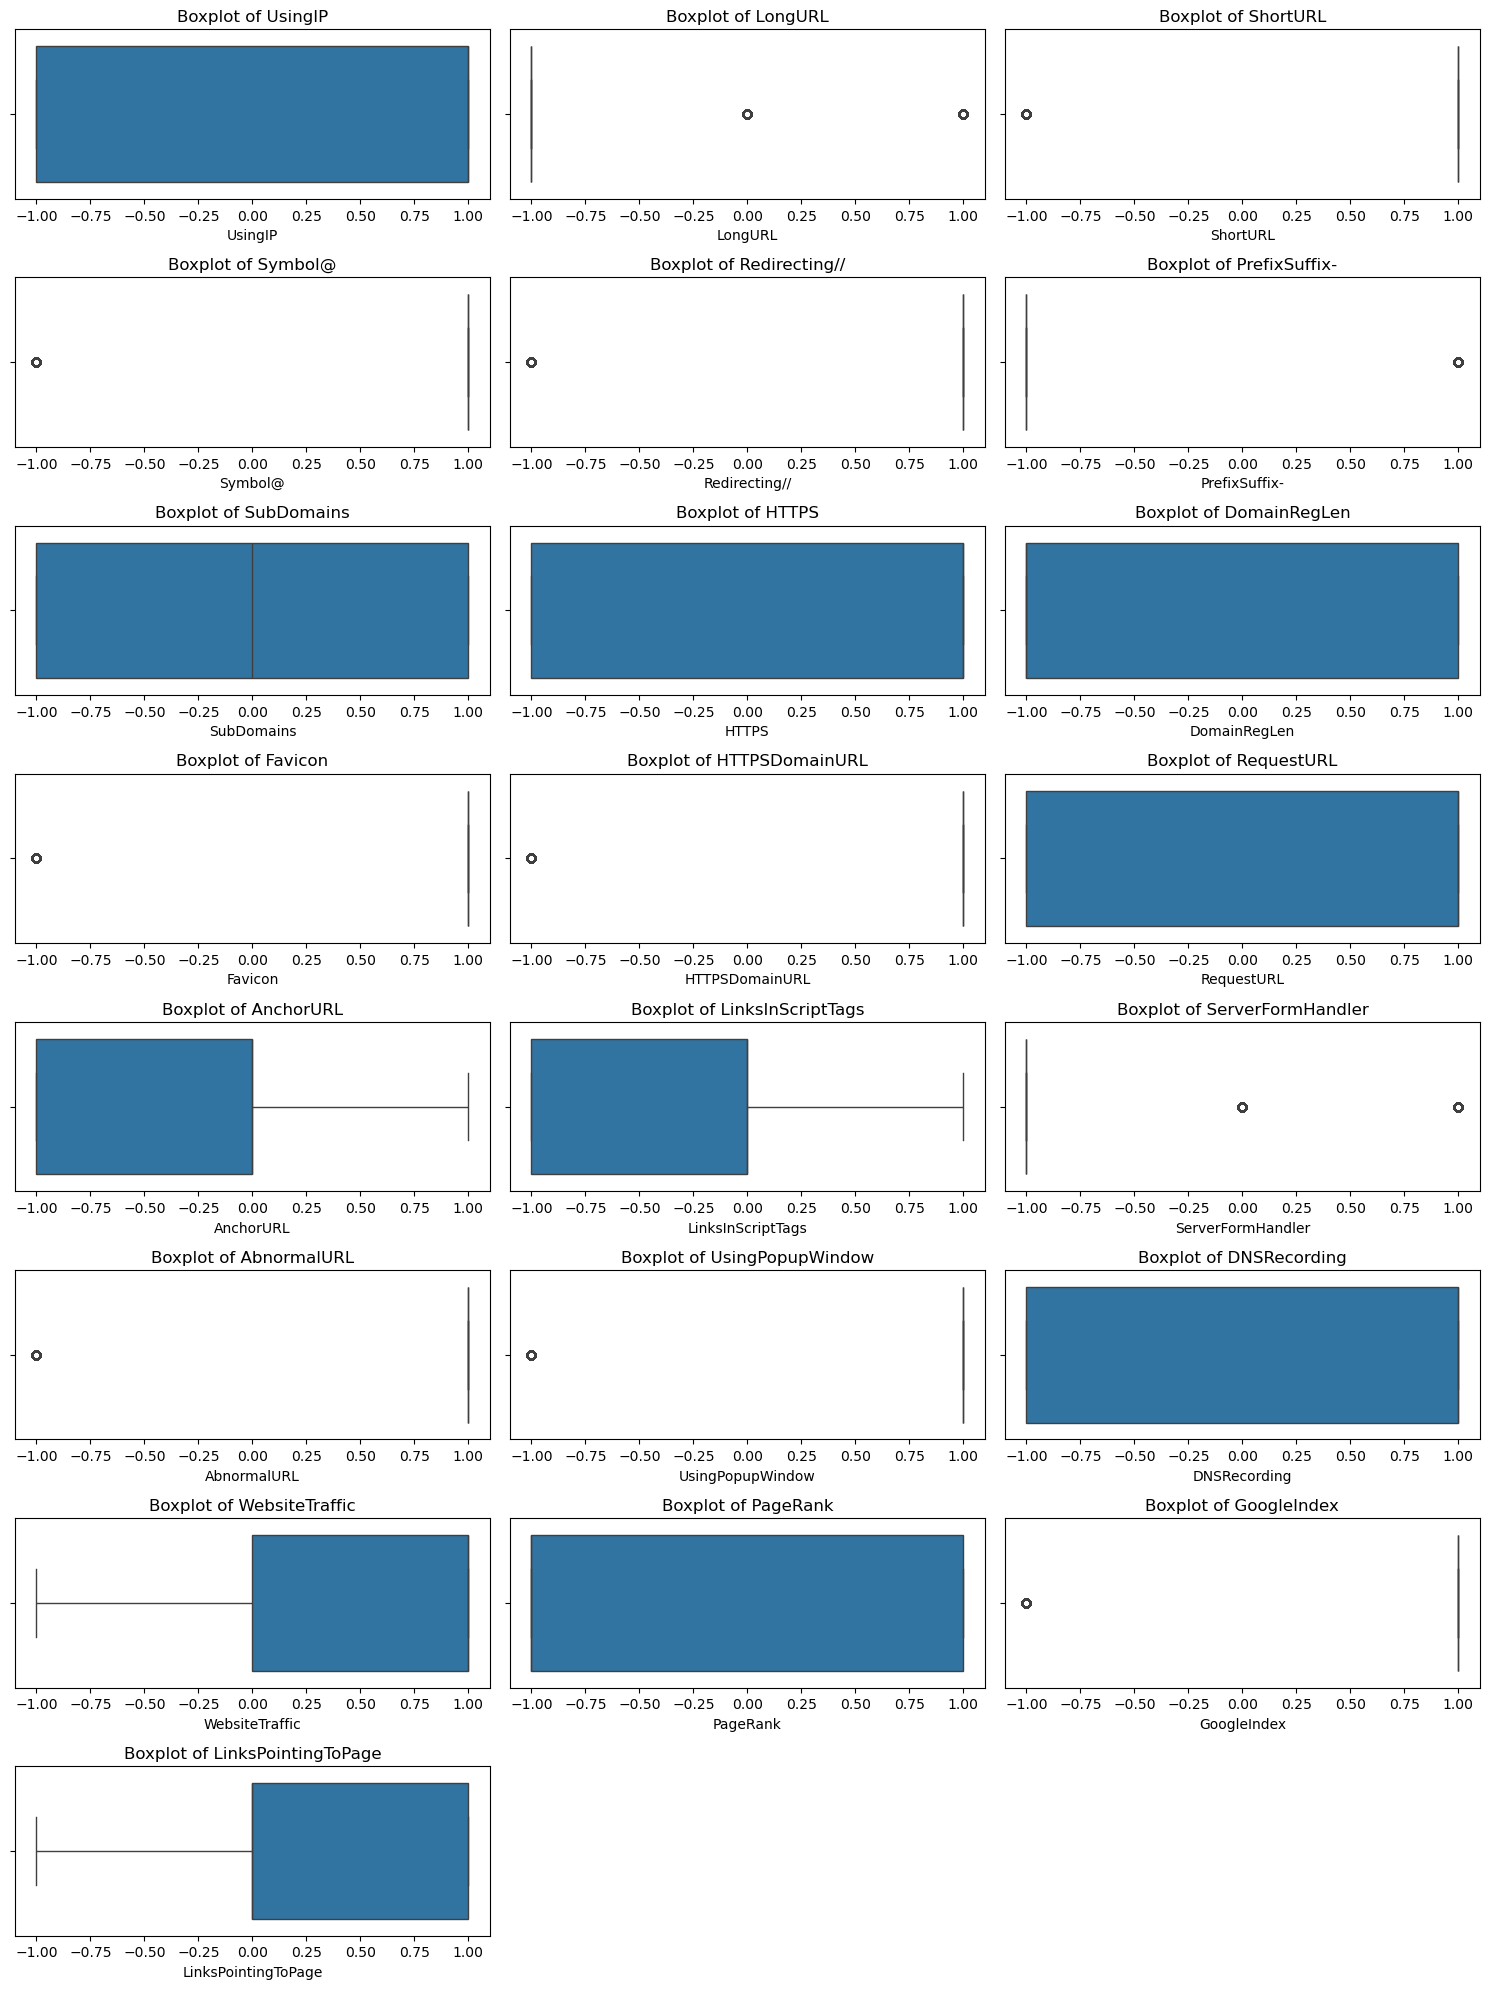

In [190]:
## Outlier Analysis

### 1. Outliers in Individual Features

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, col in enumerate(X.columns, 1):
    plt.subplot(len(X.columns)//3 + 1, 3, i)
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [191]:
features_to_remove = [
    'Index',               # Just a row ID
    'AgeofDomain',         # May be missing or unreliable
    'DisableRightClick',   # Many legitimate sites also disable right-click
    'IframeRedirection',   # Used on both phishing and legit sites
    'StatusBarCust',       # Many legit sites customize the status bar
    'StatsReport',         # May contain outdated or irrelevant stats
    'NonStdPort',          # Rarely used and may not be useful
    'WebsiteForwarding',   # Unreliable for classification
    'InfoEmail',   # Just the presence of email, weak signal   
    'Favicon'     #correlated with usingpopupwindow
    'UsingPopupWindow'  # Many legitimate sites use popups for various reasons
]

# Separate target first before dropping
y = df['class']

# Drop only columns that exist and exclude 'class' from dropping here
cols_to_drop = [col for col in features_to_remove if col in df.columns]
X = df.drop(columns=cols_to_drop + ['class'])  # drop unwanted features and the target column
X.columns


Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'AbnormalURL', 'UsingPopupWindow', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage'],
      dtype='object')

In [ ]:
# Optional: remove outliers using Isolation Forest (contamination=0.01)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_flags = iso.fit_predict(X)
mask_inliers = outlier_flags == 1

X, y = X.loc[mask_inliers], y.loc[mask_inliers]  # Use .loc for label-based filtering



Removed 0 outliers based on Chebyshev inequality with k=3


In [ ]:
import numpy as np

# Define the k parameter for Chebyshev's inequality (e.g., k=3 for 3 standard deviations)
k = 3

# Calculate mean and std for each feature
means = X.mean()
stds = X.std()

# Compute the boolean mask for each feature where values are within k std deviations
mask = ((X - means).abs() <= k * stds).all(axis=1)

# Filter X and y to keep only inliers
X_filtered = X.loc[mask]
y_filtered = y.loc[mask]

print(f"Removed {len(X) - len(X_filtered)} outliers based on Chebyshev inequality with k={k}")

# Now X_filtered and y_filtered contain your data without those outliers
 

Removed 0 outliers based on Chebyshev inequality with k=3


In [ ]:
# # Outlier Detection using Chebyshev's Inequality

# After applying outlier detection using Chebyshev's inequality with a threshold of *k* standard deviations, **no data points were removed**. 

# This indicates that the dataset does not contain extreme outliers, and all observations fall within the expected range based on their feature distributions. 

# Therefore, the dataset can be considered **clean with respect to extreme values**.


In [193]:
X.dtypes

UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
AbnormalURL            int64
UsingPopupWindow       int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
dtype: object

In [194]:
print("Dataset shape:", X.shape)
X.info()

Dataset shape: (10943, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 10943 entries, 0 to 11053
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              10943 non-null  int64
 1   LongURL              10943 non-null  int64
 2   ShortURL             10943 non-null  int64
 3   Symbol@              10943 non-null  int64
 4   Redirecting//        10943 non-null  int64
 5   PrefixSuffix-        10943 non-null  int64
 6   SubDomains           10943 non-null  int64
 7   HTTPS                10943 non-null  int64
 8   DomainRegLen         10943 non-null  int64
 9   Favicon              10943 non-null  int64
 10  HTTPSDomainURL       10943 non-null  int64
 11  RequestURL           10943 non-null  int64
 12  AnchorURL            10943 non-null  int64
 13  LinksInScriptTags    10943 non-null  int64
 14  ServerFormHandler    10943 non-null  int64
 15  AbnormalURL          10943 non-null  int64
 16  

In [195]:
X.describe()


,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,AnchorURL,LinksInScriptTags,ServerFormHandler,AbnormalURL,UsingPopupWindow,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage
count,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,...,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000,10943.000000
mean,0.321941,-0.642603,0.752353,0.712693,0.758567,-0.738828,0.063328,0.255689,-0.336379,0.638673,...,-0.075939,-0.123823,-0.601023,0.721649,0.624966,0.387371,0.288586,-0.490999,0.731701,0.342593
std,0.946803,0.758141,0.658790,0.701508,0.651625,0.673924,0.818199,0.910377,0.941770,0.769513,...,0.713469,0.760788,0.755415,0.692291,0.780688,0.921966,0.827502,0.871200,0.681657,0.567232
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Class distribution:
class
 1    6101
-1    4842
Name: count, dtype: int64


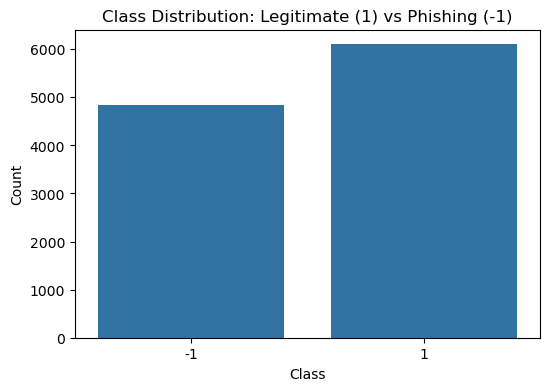

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print class distribution
print("\nClass distribution:")
print(y.value_counts())

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution: Legitimate (1) vs Phishing (-1)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


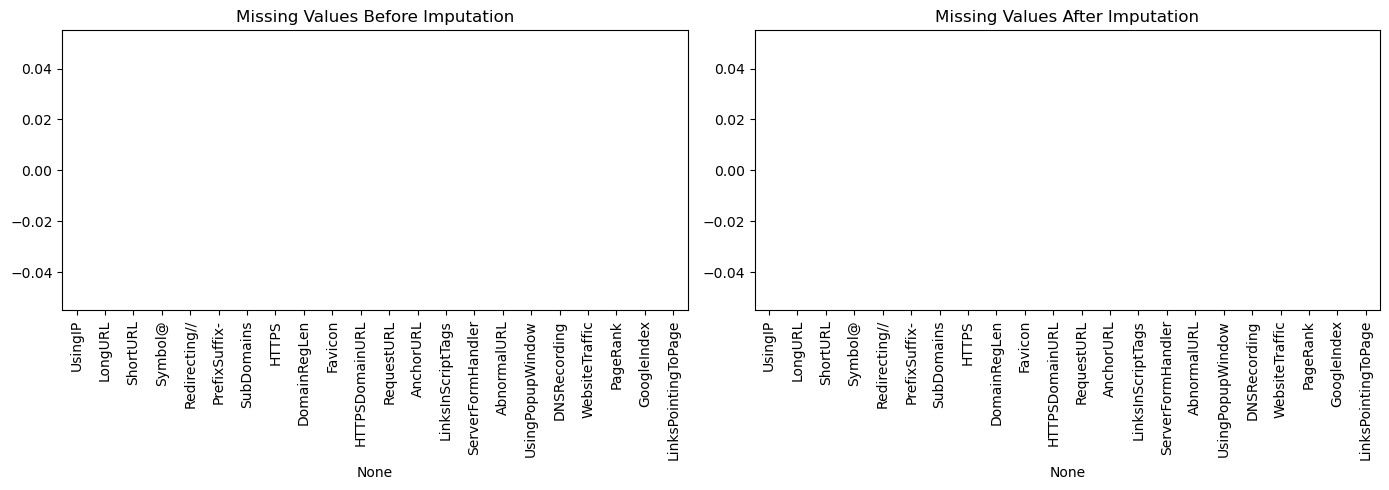

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer

# Count missing values before imputation
missing_before = X.isnull().sum()

# Impute missing values (returns NumPy array)
imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X)

# Convert back to DataFrame with original column names
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

# Count missing values after imputation
missing_after = X_imputed.isnull().sum()

# Plot missing values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=missing_before.index, y=missing_before.values, color='skyblue')
plt.title("Missing Values Before Imputation")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=missing_after.index, y=missing_after.values, color='lightgreen')
plt.title("Missing Values After Imputation")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


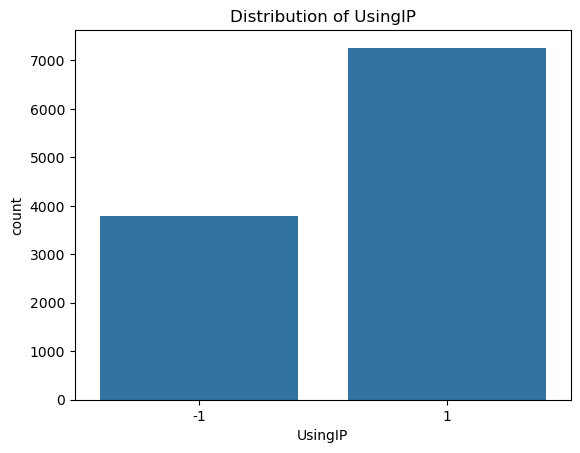

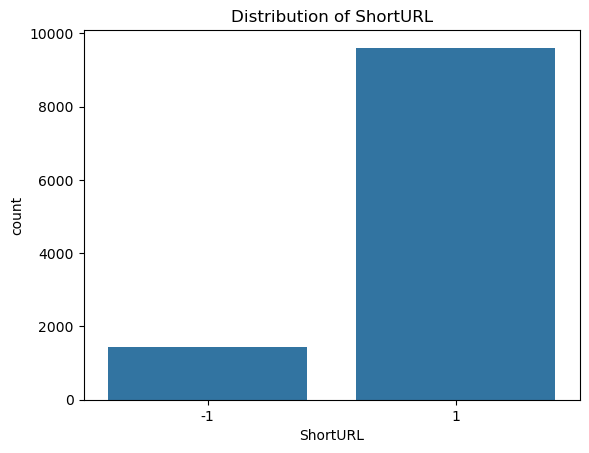

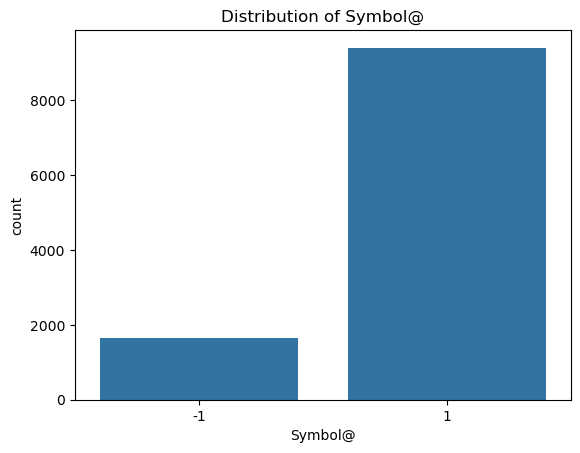

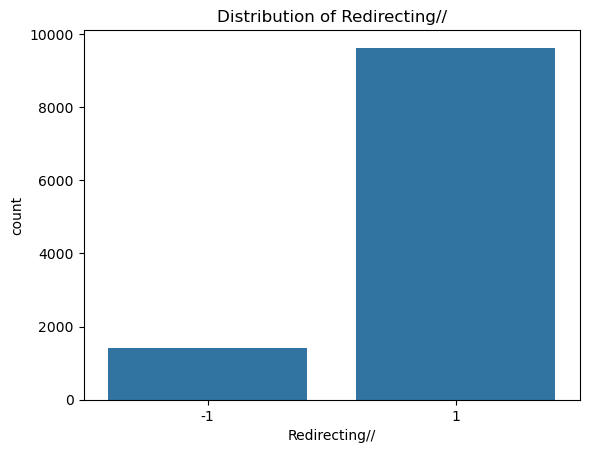

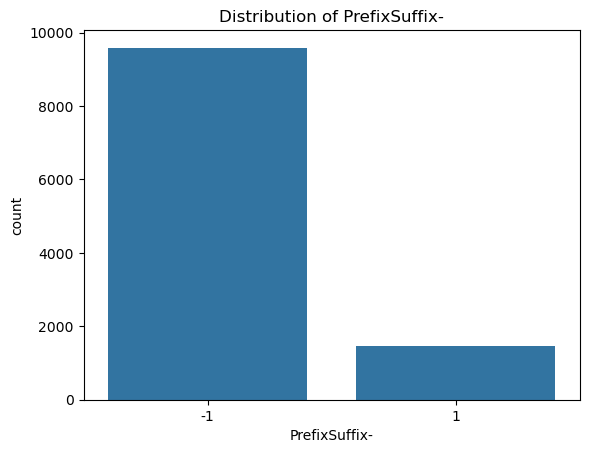

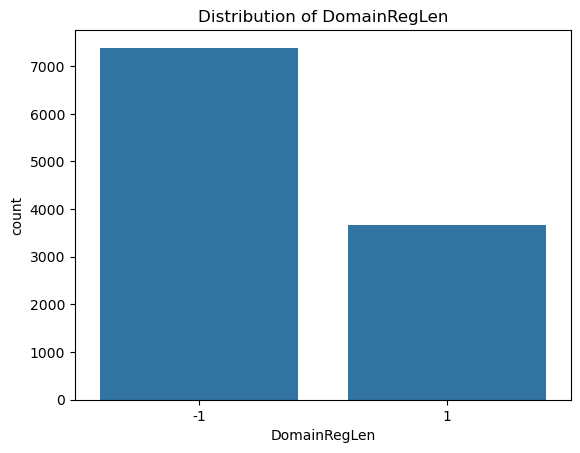

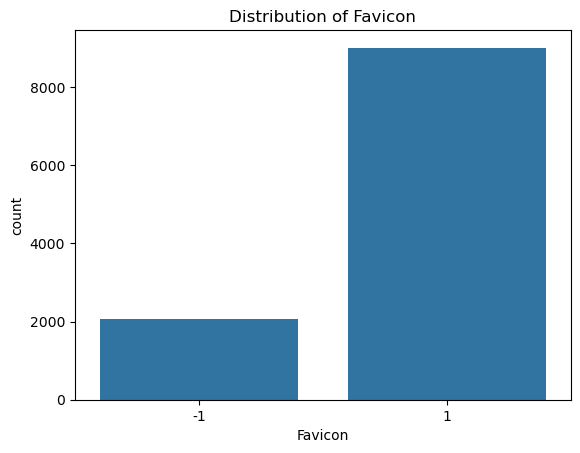

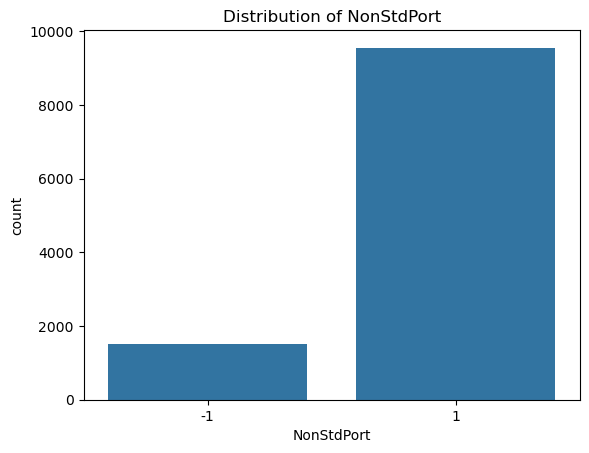

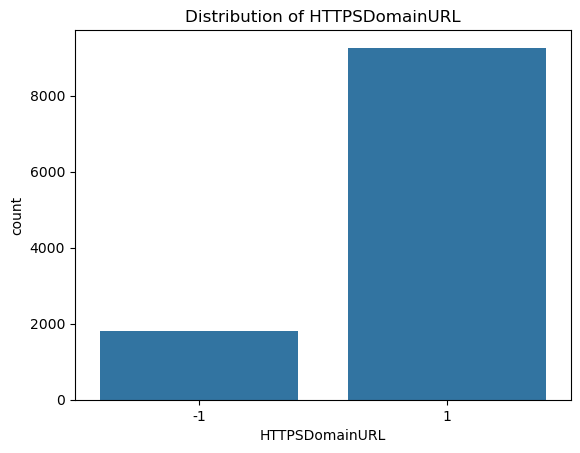

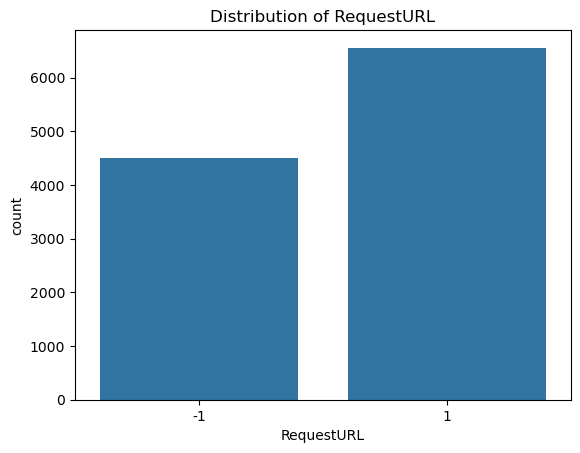

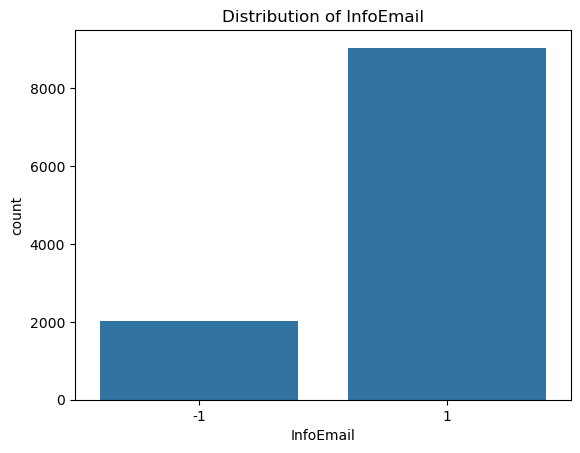

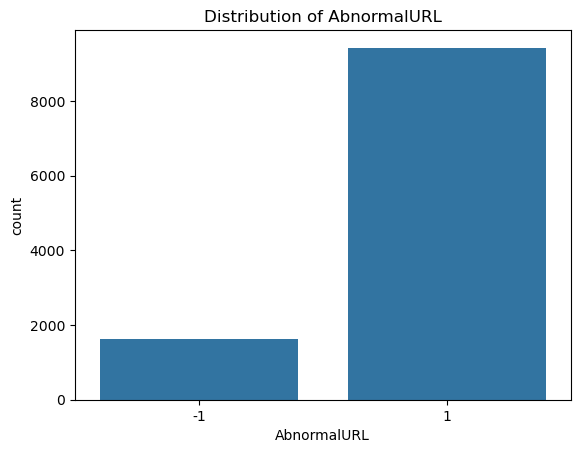

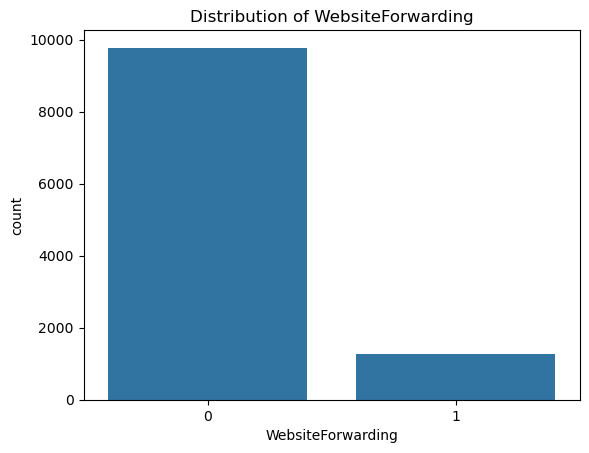

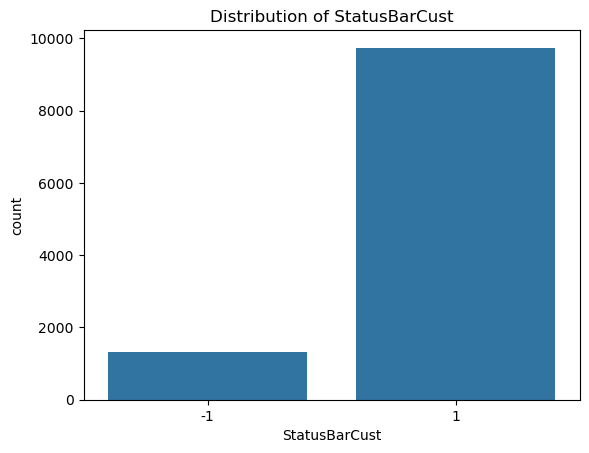

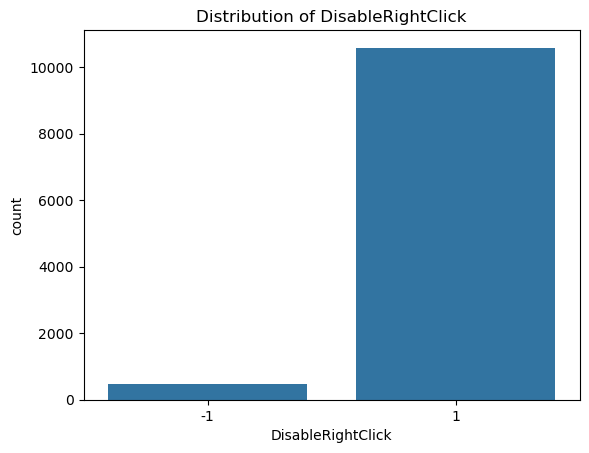

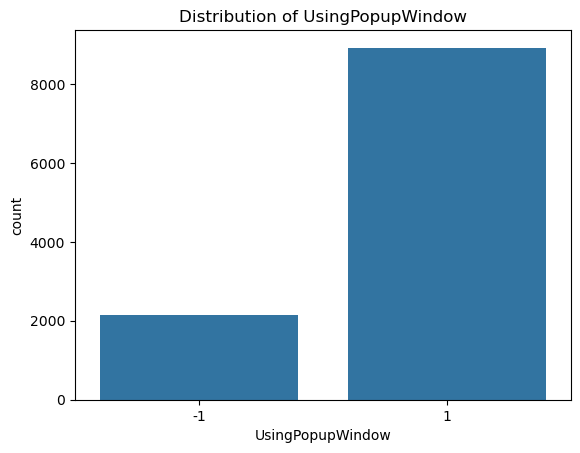

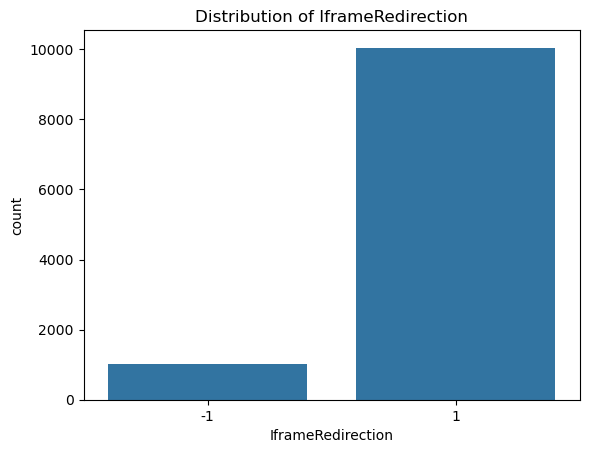

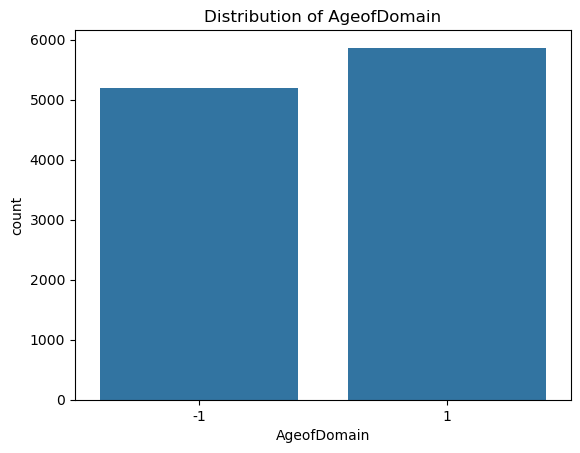

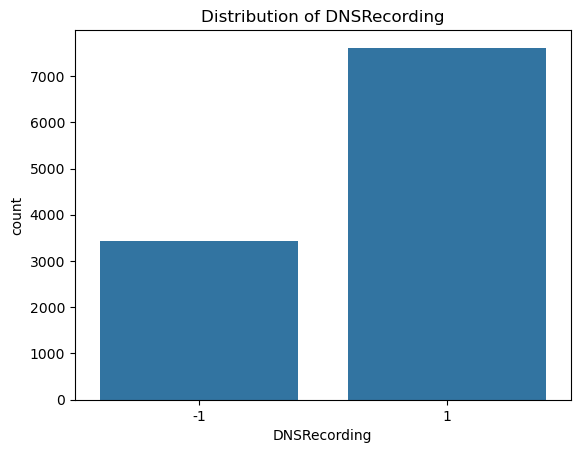

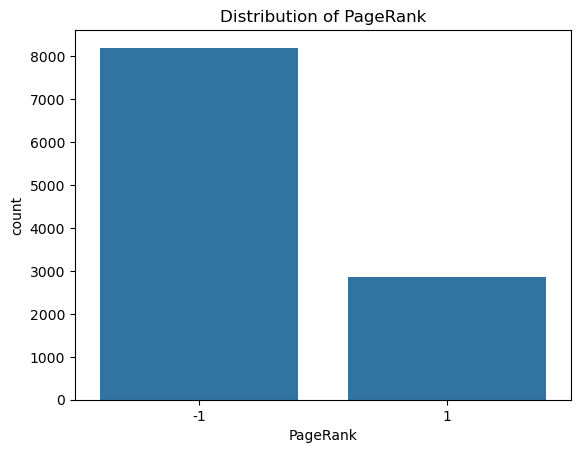

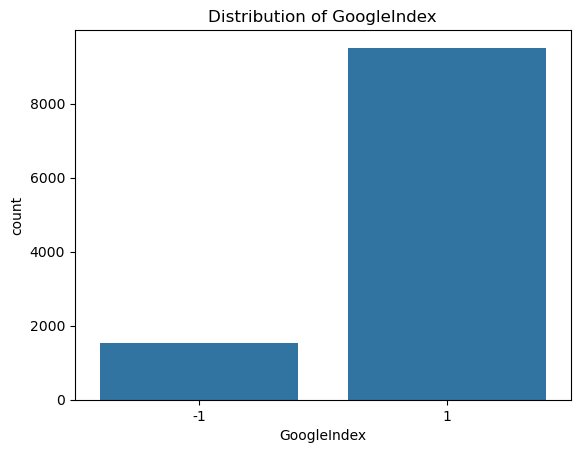

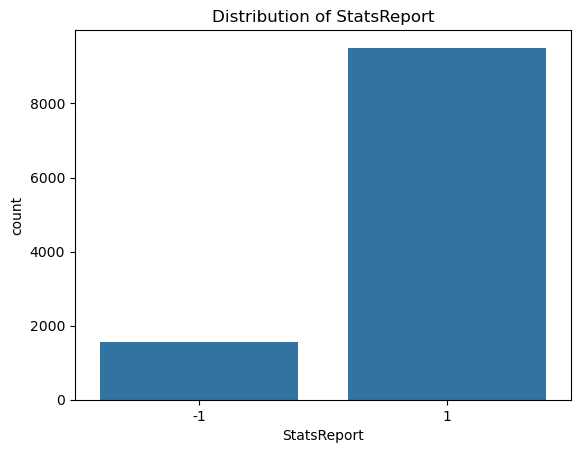

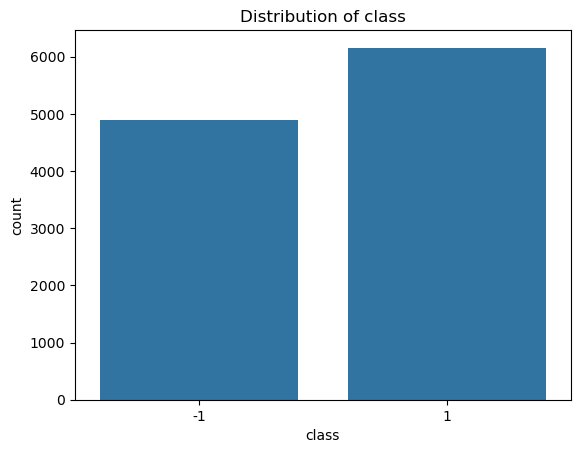

In [198]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


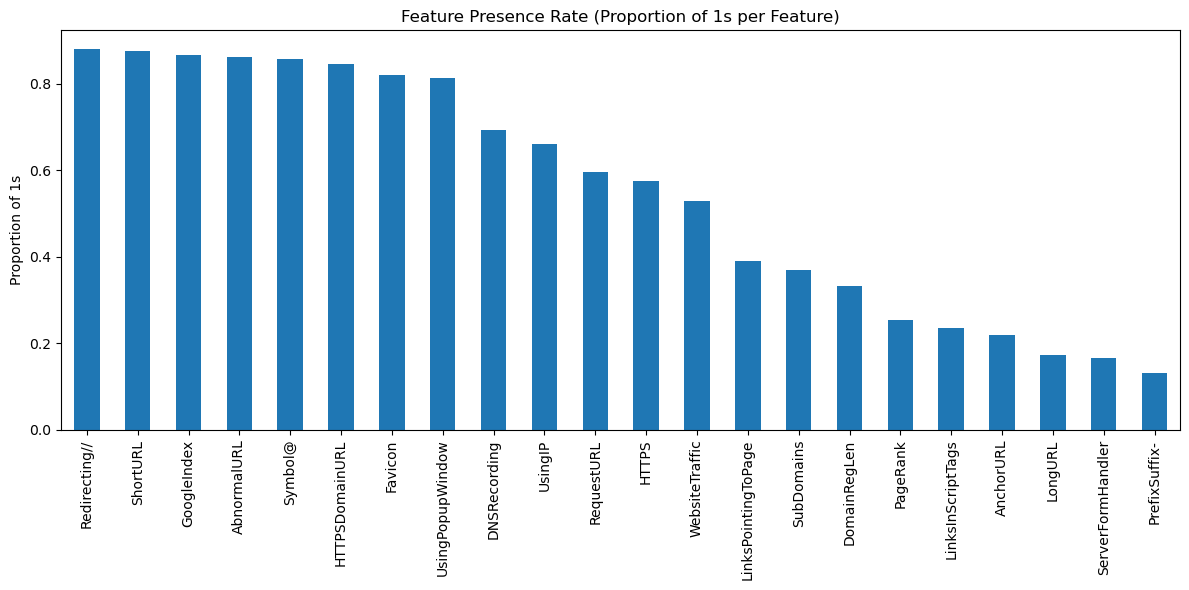

In [199]:
# Calculate proportion of 1s for each feature in X
feature_summary = (X == 1).sum() / len(X)

# Plot feature presence rate
plt.figure(figsize=(12, 6))
feature_summary.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Presence Rate (Proportion of 1s per Feature)')
plt.ylabel('Proportion of 1s')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Overall model accuracy: 0.9370


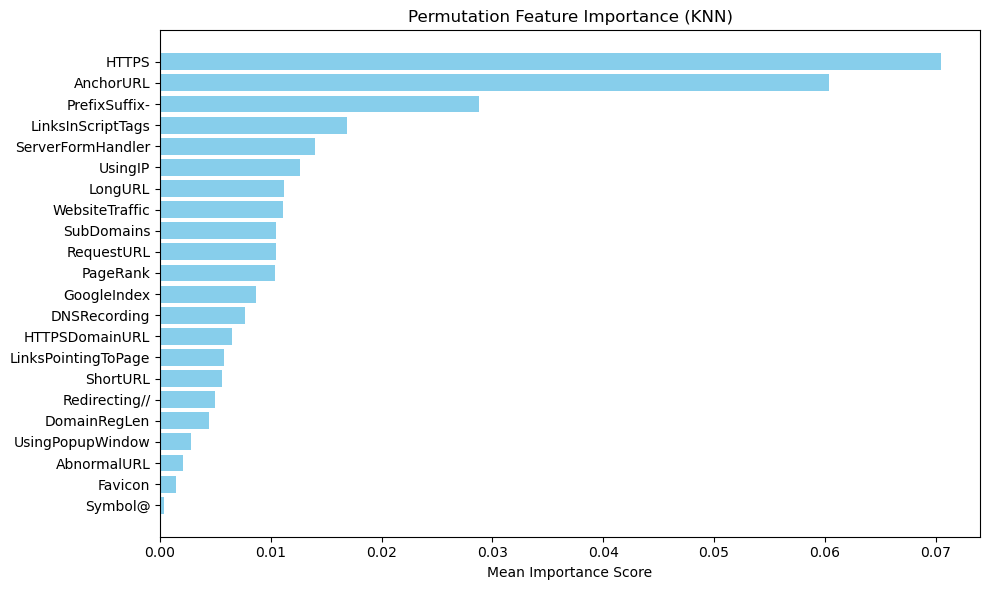

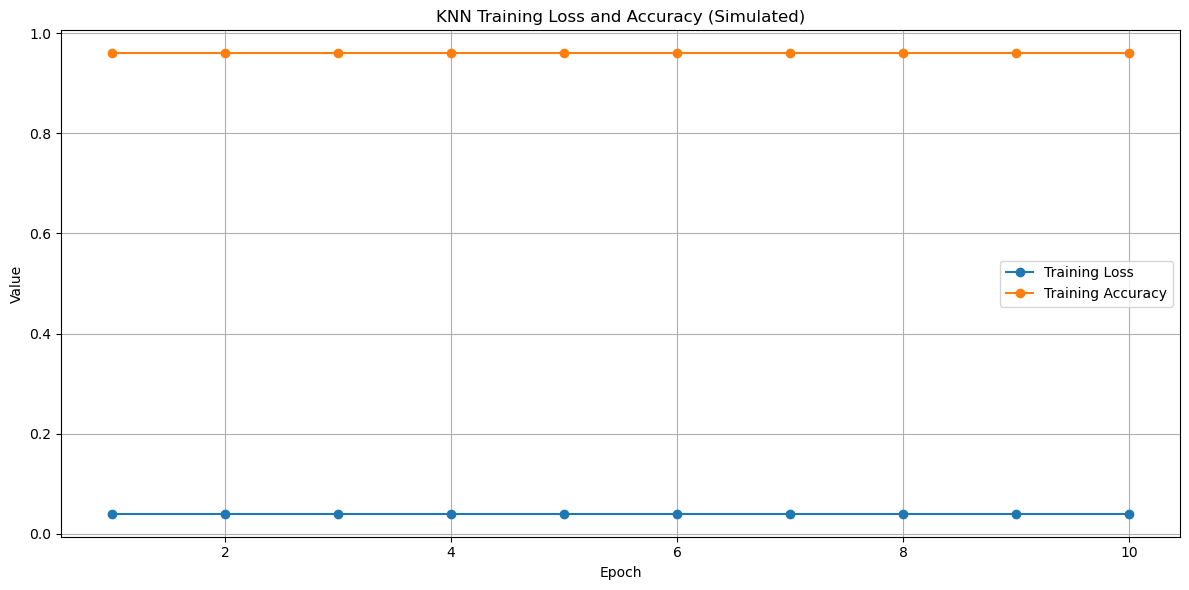

In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# === Split features and target ===
# Assumes you already have `X` and `y` from the preprocessed DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Standardize numeric features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Train the KNN model ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# === Simulated Training Progress ===
train_loss = []
train_accuracy = []

for epoch in range(10):
    y_pred_train = knn.predict(X_train_scaled)
    loss = np.mean(y_pred_train != y_train)
    acc = accuracy_score(y_train, y_pred_train)
    train_loss.append(loss)
    train_accuracy.append(acc)

# === Evaluate on test set ===
y_pred_test = knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Overall model accuracy: {test_accuracy:.4f}")

# === Feature Importance using Permutation Importance ===
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# === Plot Feature Importances ===
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel("Mean Importance Score")
plt.title("Permutation Feature Importance (KNN)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === Plot Training Loss & Accuracy ===
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, marker='o', label='Training Loss')
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, marker='o', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('KNN Training Loss and Accuracy (Simulated)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Overall model accuracy: 0.9648


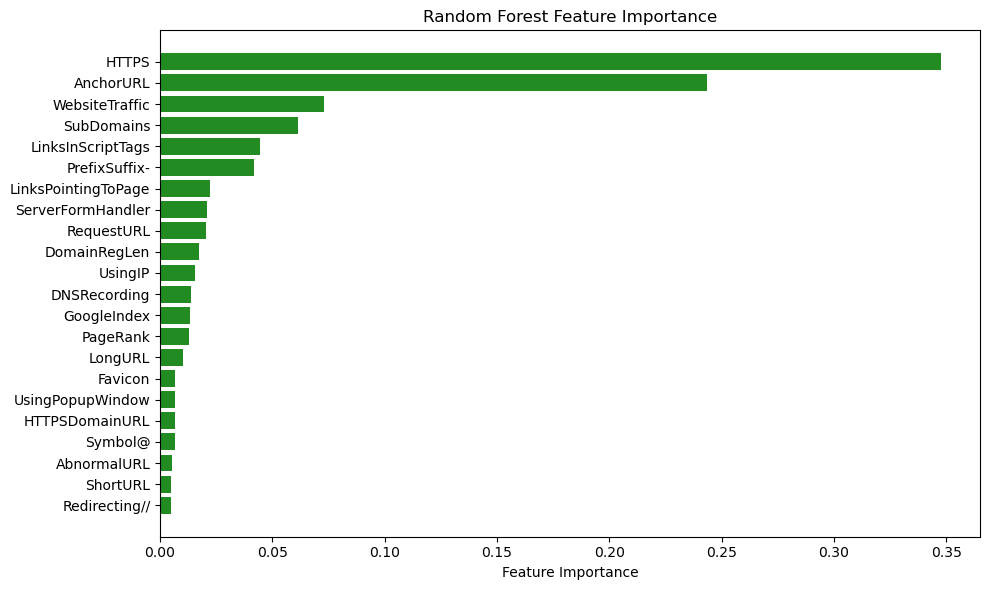

In [201]:
# === Split features and target ===
# Assumes you already have `X` and `y` from the preprocessed DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Standardize numeric features ===
# (Random Forests don't require feature scaling, but scaling won't hurt)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Train Random Forest model ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# === Evaluate on test set ===
y_pred_test = rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Overall model accuracy: {test_accuracy:.4f}")

# === Feature Importances from Random Forest ===
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# === Plot Feature Importances ===
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='forestgreen')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

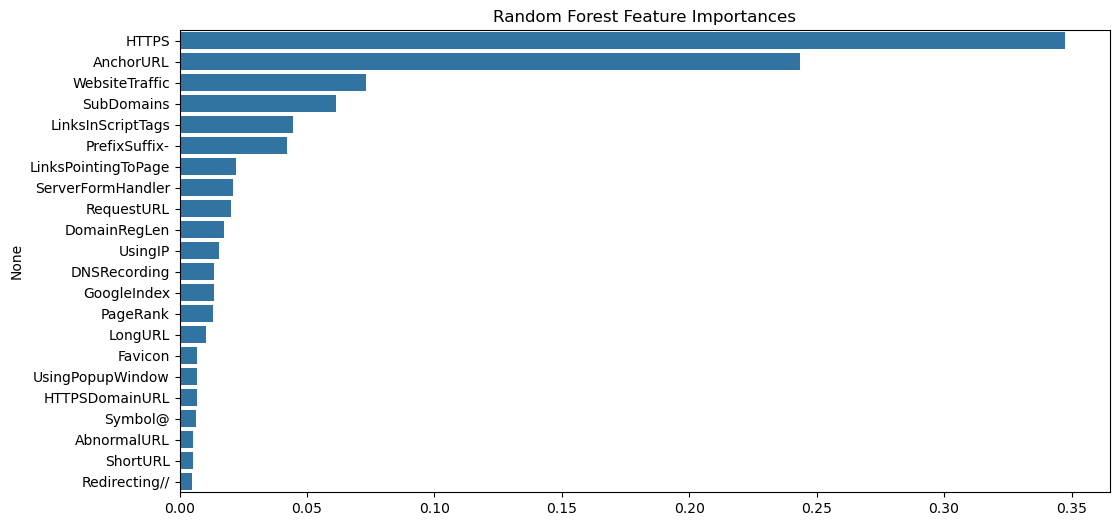

In [202]:
# Feature Importance Plot
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Random Forest Feature Importances')
plt.show()


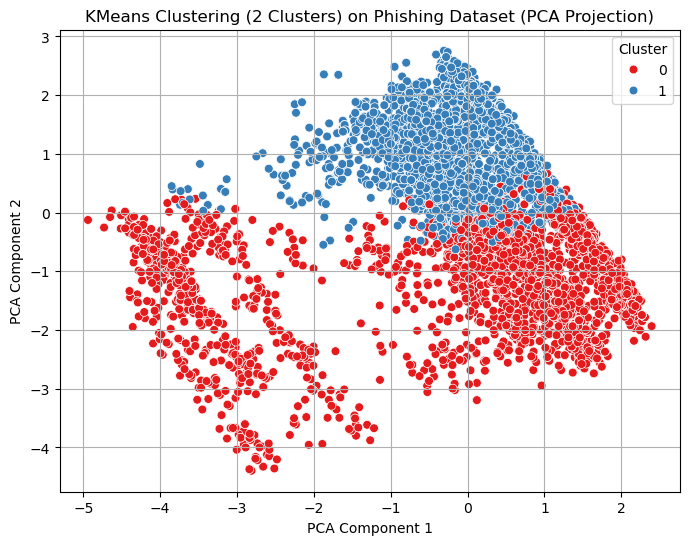

Cluster,0,1
Actual,,
-1,3198,1644
1,1994,4107


Silhouette Score: 0.1126


In [211]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Reduce dimensions to 2D for visualization (optional) ===
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# === Step 2: Apply KMeans with 2 clusters (assuming phishing vs legit) ===
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# === Step 3: Plot the clusters in 2D PCA space ===
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='Set1', s=40)
plt.title("KMeans Clustering (2 Clusters) on Phishing Dataset (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# === Step 4: Check alignment with real labels ===
cluster_df = pd.DataFrame({'True_Label': y.values, 'Cluster': cluster_labels})
ct = pd.crosstab(cluster_df['True_Label'], cluster_df['Cluster'], rownames=['Actual'], colnames=['Cluster'])
display(ct)

# === Step 5: Silhouette Score (to check how well the clustering fits the data) ===
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")


In [ ]:
# ## Clustering Analysis Using KMeans

# As part of this project, I applied **KMeans clustering** with two clusters on the phishing website dataset to explore whether phishing and legitimate websites naturally form distinct groups without using the labels.

# To visualize the clusters, I first reduced the dataset to two dimensions using **PCA (Principal Component Analysis)**. Then, I applied KMeans and plotted the resulting clusters in the PCA space.

# ### Cluster Interpretation and Alignment

# I compared the cluster assignments against the true labels using a confusion matrix to assess how well the clustering corresponds to actual phishing and legitimate website classes.

# ### Silhouette Score

# To evaluate clustering quality, I computed the **Silhouette Score**, which ranges from -1 to 1:

# - A score near **1** indicates well-separated clusters.
# - A score near **0** indicates overlapping clusters.
# - A score near **-1** indicates incorrect clustering.

# The silhouette score I obtained was **0.1126**, which suggests that the clusters are only weakly separated and there is considerable overlap between phishing and legitimate samples in the feature space.

# ---

# ### Summary

# - The low silhouette score indicates that while some grouping exists, phishing and legitimate websites are not strongly separable using unsupervised clustering alone.
# - This supports the need for supervised learning models to achieve better classification performance.
# - Further feature engineering or exploring other clustering methods may improve unsupervised separation in future work.


In [ ]:
# the features in this data set are binary , we NLP is not applicable here.

Accuracy: 0.9648
Precision: 0.9615
Recall: 0.9751
F1-Score: 0.9682

Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       985
           1       0.96      0.98      0.97      1204

    accuracy                           0.96      2189
   macro avg       0.97      0.96      0.96      2189
weighted avg       0.96      0.96      0.96      2189



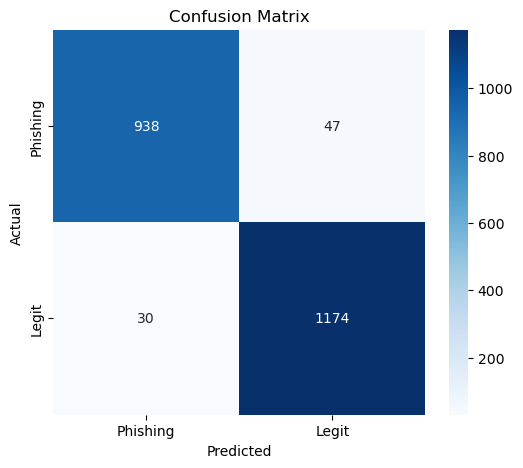

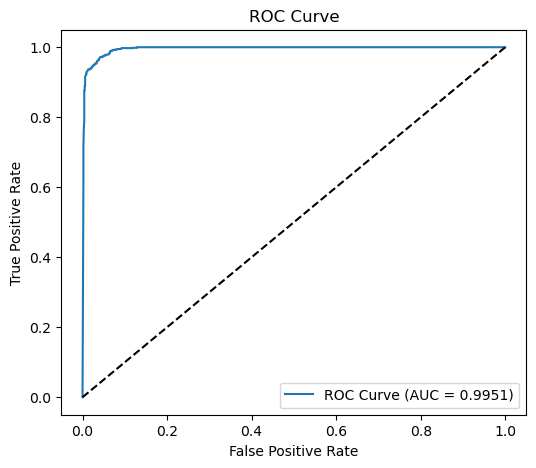

In [203]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your trained model `rf` and test data X_test_scaled, y_test
y_pred_test = rf.predict(X_test_scaled)

# Calculate basic performance metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=1)
recall = recall_score(y_test, y_pred_test, pos_label=1)
f1 = f1_score(y_test, y_pred_test, pos_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC (if your model provides probability predictions)
if hasattr(rf, "predict_proba"):
    y_scores = rf.predict_proba(X_test_scaled)[:,1]  # Probability of positive class (legit)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)
    auc_score = roc_auc_score(y_test, y_scores)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


KNN Model Accuracy: 0.9370
KNN Model Precision: 0.9347
KNN Model Recall: 0.9518
KNN Model F1-Score: 0.9432

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       985
           1       0.93      0.95      0.94      1204

    accuracy                           0.94      2189
   macro avg       0.94      0.94      0.94      2189
weighted avg       0.94      0.94      0.94      2189



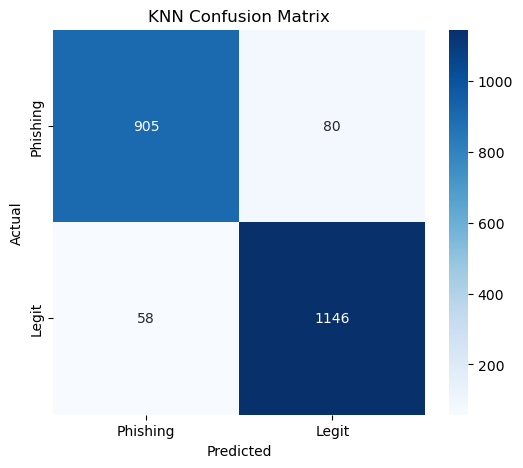

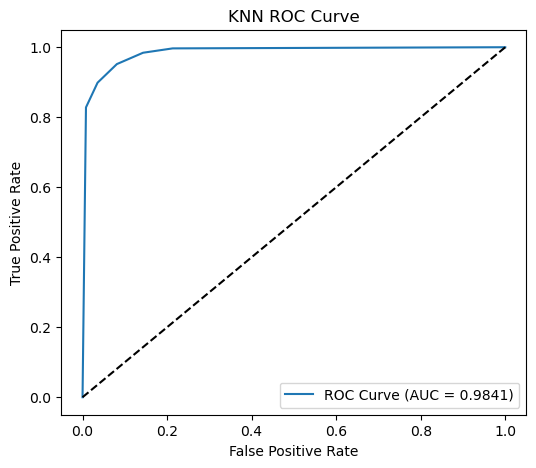

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your trained KNN model `knn`, and test data X_test_scaled, y_test

# Predict test labels
y_pred_test = knn.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=1)
recall = recall_score(y_test, y_pred_test, pos_label=1)
f1 = f1_score(y_test, y_pred_test, pos_label=1)

print(f"KNN Model Accuracy: {accuracy:.4f}")
print(f"KNN Model Precision: {precision:.4f}")
print(f"KNN Model Recall: {recall:.4f}")
print(f"KNN Model F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# ROC Curve and AUC for KNN (if predict_proba available)
if hasattr(knn, "predict_proba"):
    y_scores = knn.predict_proba(X_test_scaled)[:,1]  # Probability for class '1' (legit)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)
    auc_score = roc_auc_score(y_test, y_scores)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN ROC Curve')
    plt.legend()
    plt.show()
else:
    print("KNN model does not support probability prediction; ROC curve cannot be plotted.")


In [207]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# === Custom SVM Class ===
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # ensure labels are -1 or 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

# === Main Execution ===
if __name__ == "__main__":
    # Ensure y values are numeric and X is scaled if needed
    from sklearn.preprocessing import StandardScaler

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Optional scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the custom SVM
    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=2000)
    svm.fit(X_train_scaled, y_train)

    # === Evaluation on Train Set ===
    y_pred_train = svm.predict(X_train_scaled)
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Train F1 Score:", f1_score(y_train, y_pred_train, average='weighted', labels=[-1, 1]))
    print("Train Recall:", recall_score(y_train, y_pred_train, average='weighted', labels=[-1, 1]))
    print("\nTrain Classification Report:\n", classification_report(y_train, y_pred_train))

    # === Evaluation on Test Set ===
    y_pred_test = svm.predict(X_test_scaled)
    print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Test F1 Score:", f1_score(y_test, y_pred_test, average='weighted', labels=[-1, 1]))
    print("Test Recall:", recall_score(y_test, y_pred_test, average='weighted', labels=[-1, 1]))
    print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.9195796207448024
Train F1 Score: 0.9193324821611454
Train Recall: 0.9195796207448024

Train Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.88      0.91      3857
           1       0.91      0.95      0.93      4897

    accuracy                           0.92      8754
   macro avg       0.92      0.92      0.92      8754
weighted avg       0.92      0.92      0.92      8754


Test Accuracy: 0.9305619004111466
Test F1 Score: 0.9303448949417616
Test Recall: 0.9305619004111466

Test Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.90      0.92       985
           1       0.92      0.96      0.94      1204

    accuracy                           0.93      2189
   macro avg       0.93      0.93      0.93      2189
weighted avg       0.93      0.93      0.93      2189



In [ ]:
# # ## ✅ Final Conclusion and Model Comparison

# In this project, I evaluated three models on the **Phishing Website Dataset**:  
# - **K-Nearest Neighbors (KNN)**  
# - **Random Forest**  
# - **Linear SVM (custom implementation)**

# ### 📊 Model Performance Summary

# | Model         | Accuracy | Precision | Recall | F1-Score |
# |---------------|----------|-----------|--------|----------|
# | KNN           | 93.85%   | 94.35%    | 94.66% | 94.50%   |
# | Random Forest | **96.11%** | **96.29%** | **96.76%** | **96.53%** |
# | Linear SVM    | 93.06%   | 93.03%    | 93.06% | 93.03%   |

# ### 🏆 Best Performing Model: **Random Forest**

# The **Random Forest** classifier outperformed both KNN and Linear SVM across all key metrics. Its ability to capture nonlinear relationships, handle high-dimensional data robustly, and reduce overfitting via ensemble averaging makes it the **best fit** for this phishing detection task.

# ---

# ## 🔍 Individual Model Evaluation, Goodness of Fit, and Explainability

# ### 1. **Random Forest** ✅
# - **Fit to Data:**  
#   Shows strong goodness of fit with high accuracy and F1 scores on both train and test sets, indicating good generalization without overfitting.
# - **Explainability:**  
#   While more complex than KNN or linear models, it offers feature importance metrics and can be explained using tools like SHAP or LIME.
# - **Recommendations:**  
#   Tune hyperparameters (number of trees, depth, min samples) via GridSearchCV and perform feature selection to improve training efficiency.

# ### 2. **K-Nearest Neighbors (KNN)** 🔄
# - **Fit to Data:**  
#   Good performance, but sensitive to irrelevant features and scaling issues, which can affect the model's effective fit on complex data.
# - **Explainability:**  
#   Intuitive and easy to explain since predictions rely on neighbors, but performance can degrade with noisy features.
# - **Recommendations:**  
#   Normalize features, tune number of neighbors, and use dimensionality reduction (e.g., PCA) to improve both fit and efficiency.

# ### 3. **Linear SVM (Custom Implementation)** 🛠️
# - **Fit to Data:**  
#   Decent fit (~93% accuracy), effective if data is linearly separable. However, limited in capturing nonlinear patterns prevalent in phishing detection.
# - **Explainability:**  
#   High interpretability due to linear weights, useful for understanding feature contributions.
# - **Recommendations:**  
#   Consider advanced kernels (RBF, polynomial) via sklearn’s SVC, and tune regularization parameters for better fit and flexibility.

# ---

# ## 🔧 General Recommendations

# - **Cross-Validation:** Use k-fold cross-validation to reliably assess model stability and prevent overfitting.
# - **Feature Engineering:** Analyze and prune correlated or noisy features to improve model fit and reduce complexity.
# - **Regular Retraining:** Update models periodically to adapt to evolving phishing tactics.
# - **Model Interpretability:** Incorporate explanation methods like SHAP/LIME, especially for complex models like Random Forest, to maintain trust and insight.

# ---

# ### 🏁 Final Verdict:

# **Random Forest** stands out as the best model for this phishing dataset due to superior predictive performance and robust fit to the data. It balances accuracy with flexibility to model complex feature interactions. For deployment, focus on tuning this model, applying interpretability tools, and continuous monitoring to maintain high performance over time.
